In [1]:
!pip install sklearn

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import numpy as np
import pandas as pd

In [2]:
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0) # Draw samples from a uniform distribution. 
        # Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high)
        ageCentroid = random.uniform(20.0, 70.0)
        X.append([incomeCentroid, ageCentroid])
        
        for j in range(int(pointsPerCluster) - 1):
            # normal : Draw random samples from a normal (Gaussian) distribution.
            # loc : Mean (“centre”) of the distribution.
            # scale : Standard deviation (spread or “width”) of the distribution. Must be non-negative.
            X.append([np.random.normal(loc=incomeCentroid, scale=20000.0), np.random.normal(loc=ageCentroid, scale=2.0)])
            
    X = np.array(X)
    return X

## Why we should scale data ?
If you have two features, one where the differences between cases is large and the other small, are you prepared to have the former as almost the only driver of distance?

So for example if you clustered people on their weights in kilograms and heights in metres, is a 1kg difference as significant as a 1m difference in height? Does it matter that you would get different clusterings on weights in kilograms and heights in centimetres? If your answers are "no" and "yes" respectively then you should probably scale.

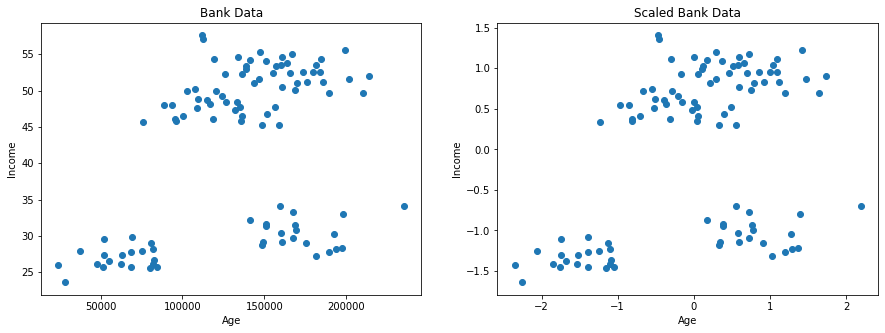

In [3]:
data = createClusteredData(100, 5)
scaled_data = scale(data)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(data[:, 0], data[:, 1])
ax[0].set(xlabel='Income', ylabel='Age', title="Bank Data")

ax[1].scatter(scaled_data[:, 0], scaled_data[:, 1])
ax[1].set(xlabel='Income', ylabel='Age', title="Scaled Bank Data")

plt.show()

## What is Inertia ? 
Inertia is the sum of squared distance of samples to their closest cluster center. We would like this number to be as small as possible. But, if we choose K that is equal to the number of samples we will get inertia=0

Text(0, 0.5, 'Inertia')

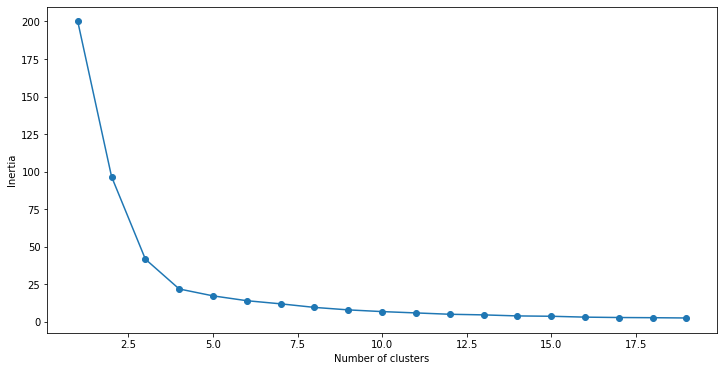

In [4]:
SSE = []
for cluster in range(1,20):
    model = KMeans(n_clusters = cluster, init='k-means++')
    model.fit(scaled_data)
    SSE.append(model.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

[0 0 0 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 0 0 0 0 0 0 0 3 3 3
 0 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3]


C:\Users\rezaz\AppData\Local\Temp\ipykernel_25296\2880312445.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(np.int))


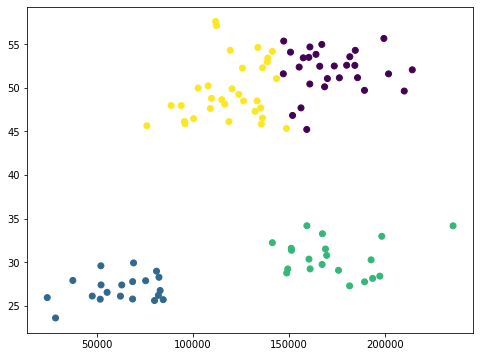

In [5]:

model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(np.int))
plt.show()